### Genetic Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import random

In [2]:
uk_populasi = 20
uktour = 5
ukkrom = 10
pc = 0.76
pm = 0.31

**Inisiasi Populasi Awal**

In [3]:
def generatePopulasi(uk_pop, uk_krom):
    pop = []
    for i in range(uk_pop):
        pop.append([random.randint(0,9) for i in range(uk_krom)])
    return pop

**Decode**

In [4]:
def phenotype(krom):
    x_x1 = 0
    d_x1 = 0
    x_x2 = 0
    d_x2 = 0

    j = 1
    k = 1
    for i in range (len(krom)):
        if (i < (len(krom) / 2)):
            x_x1 += (krom[i] * (1 / np.power(10,j)))
            d_x1 += (9 / np.power(10,j))
            j+=1
        else:
            x_x2 += (krom[i] * (1 / np.power(10,k)))
            d_x2 += (9/ np.power(10,k))
            k+=1
    x1 = -1 + (3 * x_x1 / d_x1) #phenotype x1
    x2 = -1 + (2 * x_x2 / d_x2) #phenotype x2

    return [x1,x2]

**Hitung Fitness**

In [5]:
def hitungFitness(krom):
    k = phenotype(krom)
    f = -(math.cos(k[0]) * math.sin(k[1]) - (k[0]/((k[1])**2 + 1)))
    return f

In [6]:
def hitungFitnessAll(pop):
    fit_all = []    
    for i in range(len(pop)):
        fit_all.append(hitungFitness(pop[i]))
    return fit_all

**Parent Selection**

disini saya akan menggunakan Tournament

In [7]:
def tournamentSelection(pop, uk_tour):
    best_krom = []
    for i in range(1, uk_tour):
        krom = pop[random.randint(0,len(pop)-1)]
        if (best_krom == [] or hitungFitness(krom) > hitungFitness(best_krom)):
            best_krom = krom
    return best_krom

**Crossover**

In [8]:
def crossover(par1, par2, pc, ukrom):
    r = random.random()
    if (r < pc):
        point = random.randint(0,ukrom-1)
        for i in range(point):
            temp1 = par2[i]
            temp2 = par1[i]
            par1[i] = temp1
            par2[i] = temp2
    return par1, par2

**Mutasi**

melakukan mutasi apabila nilai random lebih kecil dari probabilitas mutasi

In [9]:
def mutasi(par1, par2, pm, uk_krom):
    r = random.random()
    if (r < pm):
        par1[random.randint(0,uk_krom-1)] = random.randint(0,9)
        par2[random.randint(0,uk_krom-1)] = random.randint(0,9)
    return par1, par2

**Pergantian Generasi**

berdasarkan fitness

In [10]:
def getElitisme(fit_all):
    return fit_all.index(max(fit_all))

***Main Program***

Result

Best Chromosom/Induvidu  =  [9, 9, 9, 9, 9, 5, 5, 2, 9, 0]
Best Fitness             =  2.0218067819202177
Decode Result            =  [2.0, 0.10581105811058111]


<function matplotlib.pyplot.show>

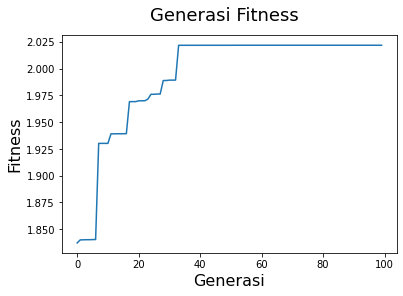

In [11]:
populasi = generatePopulasi(uk_populasi, ukkrom)
fit = []
generasi = 100

for i in range(generasi):
    fitness = hitungFitnessAll(populasi)
    new_populasi = []

    best = getElitisme(fitness)
    fit.append(hitungFitness(populasi[best]))
    new_populasi.append(populasi[best])
    new_populasi.append(populasi[best])
    i = 0
    while (i < uk_populasi-2):
        parent1 = tournamentSelection(populasi, uktour)
        parent2 = tournamentSelection(populasi, uktour)
        while (parent1 == parent2):
            parent2 = tournamentSelection(populasi, uktour)
        par1, par2 = copy.deepcopy(parent1), copy.deepcopy(parent2)
        child = crossover(par1, par2, pc, ukkrom)
        child = mutasi(child[0], child[1], pm, ukkrom)
        new_populasi += child
        i += 2
    populasi = new_populasi

fitness = hitungFitnessAll(populasi)
result = getElitisme(fitness)

print('Result')
print()
print('Best Chromosom/Induvidu  = ', populasi[result])
print('Best Fitness             = ', hitungFitness(populasi[result]))
print('Decode Result            = ', phenotype(populasi[result]))
plt.plot(fit)
plt.suptitle("Generasi Fitness", size=18)
plt.xlabel('Generasi', fontsize=16)
plt.ylabel('Fitness', fontsize=16)
plt.show

**Thank You**